#### 1. Import necessary Libraries

In [94]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from numpy.polynomial.polynomial import polyfit
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import warnings

#### Question :

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

#### Import data

In [95]:
startup_data = pd.read_csv('50_Startups.csv')
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#### Initial Analysis

In [96]:
startup_data.shape

(50, 5)

In [97]:
startup_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [98]:
startup_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [99]:
startup_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


#### Linearity Check

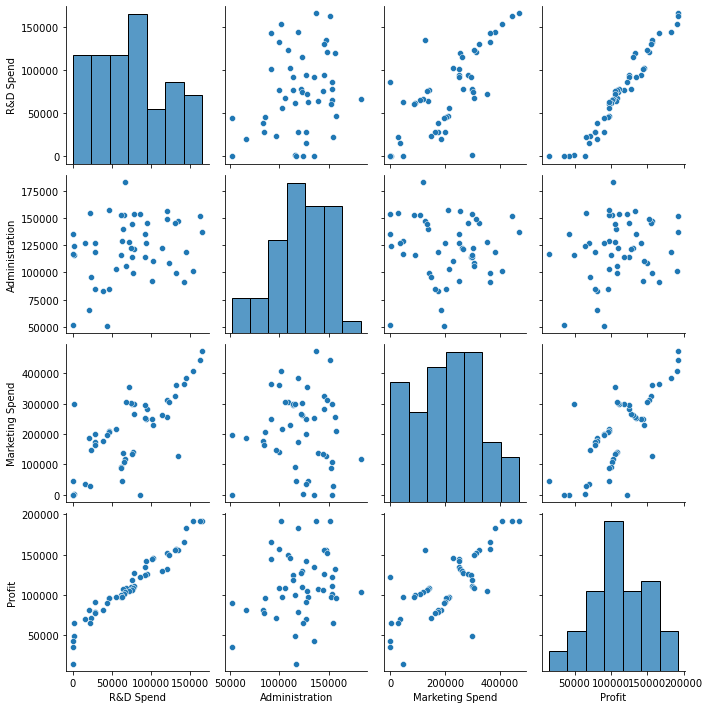

In [100]:
sns.pairplot(startup_data)

In [101]:
corr=startup_data.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

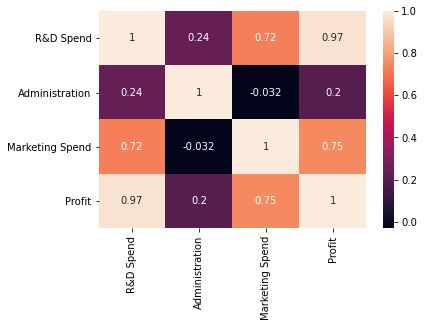

In [102]:
sns.heatmap(corr, annot = True)

#### Regression Model

In [103]:
s_d1 = pd.get_dummies(startup_data, columns=['State'])    #convert categorical variable into dummy /indicator variable. 
x = s_d1[['R&D Spend','Administration', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
y = s_d1[['Profit']]

In [104]:
x

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


In [105]:
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [106]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           1.34e-27
Time:                        22:24:56   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State_Florida     5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
State_New York    5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Here R square value is good and we can accept the model but as we can see all variables do not have acceptable p values. Thus we can check for multicollinearity now and will solve multicoliinearity for the same**

#### Solving Multicollinearity
a - Finding Cook's Distance

In [108]:
inf= model.get_influence() #to calculate the main influence and outlier measures for the OLS regression.

In [109]:
summary=inf.summary_frame() #Creates a DataFrame with all available influence results.
summary.sort_values('cooks_d', ascending=False)

,dfb_R&D Spend,dfb_Administration,dfb_Marketing Spend,dfb_State_California,dfb_State_Florida,dfb_State_New York,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
49,0.578956,-0.114232,0.080954,-0.566028,-0.246221,-0.231130,0.263959,-3.744509,0.101490,-1.258474,-4.484594,-1.507205
48,-0.112734,0.701599,0.418630,-0.783828,-0.801849,-0.951339,0.156376,-1.651796,0.255887,-0.968637,-1.686029,-0.988712
45,-0.212843,0.091394,-0.189969,0.095382,0.140857,0.295051,0.094395,1.966666,0.127729,0.752575,2.035721,0.779000
14,-0.221204,-0.257240,0.142195,0.267421,0.086725,0.275394,0.072017,-1.914478,0.105459,-0.657343,-1.976719,-0.678713
36,-0.379353,0.189523,0.218405,-0.107545,0.053174,-0.090698,0.059247,1.714446,0.107892,0.596224,1.754467,0.610141
38,-0.189819,-0.313449,0.109261,0.320201,0.309091,0.445171,0.055802,1.341034,0.156954,0.578628,1.353659,0.584076
15,-0.208289,0.066627,0.071114,-0.002577,0.007587,-0.143330,0.043416,-1.787748,0.075363,-0.510387,-1.835225,-0.523941
46,0.434369,-0.142646,-0.364064,0.106828,0.034265,0.093661,0.042323,-0.838336,0.265420,-0.503925,-0.835454,-0.502192
19,0.252210,0.039342,-0.342025,0.009492,0.035168,0.085832,0.032891,0.857080,0.211760,0.444236,0.854447,0.442872
27,0.271462,-0.146112,-0.339679,0.169919,0.186504,0.075224,0.032503,-1.063541,0.147057,-0.441609,-1.065166,-0.442284


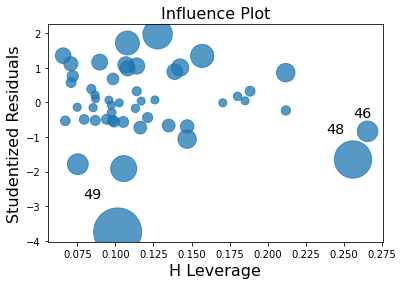

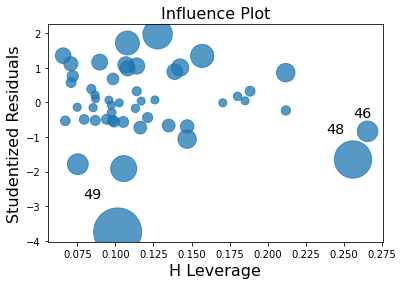

In [110]:
inf.plot_influence()

**Frm the above we can see that index 48, 49 has highest Cook's Distance, hence we will  drop this row from the data set**

**Now Finding Variance Inflation Factor (VIF)**

In [111]:
s_d2 = s_d1.drop(s_d1.index[[49,48]])
s_d2

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [112]:
vif = pd.DataFrame()

In [113]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [114]:
vif["features"] = X.columns
vif.round(2)

,VIF Factor,features
0,2.50,R&D Spend
1,1.18,Administration
2,2.42,Marketing Spend
3,9.04,State_California
4,9.44,State_Florida
5,9.22,State_New York


**FROM Above VIF Factor, we see Administration has the lowest variance inflation factor We would need to discard this variables to improve model and try to solve multicolinearity.**

* **Removing administration from the dataframe and the model**

In [150]:
x_new=s_d2[['R&D Spend', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
y= s_d2[['Profit']]

In [116]:
new_model = sm.OLS(y, x_new).fit()
predictions = new_model.predict(x_new)

In [117]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     265.9
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           1.02e-29
Time:                        22:25:14   Log-Likelihood:                -494.30
No. Observations:                  48   AIC:                             998.6
Df Residuals:                      43   BIC:                             1008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7692      0.035     22.072      0.000       0.699       0.840
Marketing Spend      0.0251      0.013      1.908      0.063      -0.001       0.052
State_California  5.183e+04   2710.866     19.120      0.000    4.64e+04    5.73e+04
State_Florida     5.046e+04   3078.590     16.391      0.000    4.43e+04    5.67e+04
State_New York     5.09e+04   2936.767     17.333      0.000     4.5e+04    5.68e+04
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.304
Skew:                           0.097   Prob(JB):                        0.859
Kurtosis:                       2.661   Cond. No.                     1.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**After removing Now the Model has accpetable p Value and R sq values**

* **Now using Model Transformation technique to get the best model**

#### Sqrt transformation of x &y

In [151]:
X_sqrt = np.sqrt(x_new[['R&D Spend', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']])
Y_sqrt = np.sqrt(y['Profit'])

In [152]:
model3 = sm.OLS(Y_sqrt, X_sqrt).fit()
predict3 = model3.predict(X_sqrt)

In [153]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     141.7
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           3.64e-24
Time:                        14:03:14   Log-Likelihood:                -196.16
No. Observations:                  48   AIC:                             402.3
Df Residuals:                      43   BIC:                             411.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.5271      0.030     17.371      0.000       0.466       0.588
Marketing Spend      0.0231      0.018      1.270      0.211      -0.014       0.060
State_California   187.8689      7.377     25.465      0.000     172.991     202.747
State_Florida      187.0162      8.256     22.652      0.000     170.366     203.666
State_New York     189.8076      7.759     24.463      0.000     174.160     205.455
==============================================================================
Omnibus:                        7.976   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.007
Skew:                           0.870   Prob(JB):                       0.0301
Kurtosis:                       3.692   Cond. No.                     3.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Homoscedasticity CHECK

In [123]:
x_new=s_d2[['R&D Spend', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
y= s_d2[['Profit']]

In [124]:
x_new

,R&D Spend,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,471784.10,0,0,1
1,162597.70,443898.53,1,0,0
2,153441.51,407934.54,0,1,0
3,144372.41,383199.62,0,0,1
4,142107.34,366168.42,0,1,0
5,131876.90,362861.36,0,0,1
6,134615.46,127716.82,1,0,0
7,130298.13,323876.68,0,1,0
8,120542.52,311613.29,0,0,1
9,123334.88,304981.62,1,0,0


In [125]:
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [126]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_x_new = std_scaler.fit_transform(x_new)
print(scaled_x_new)

[[ 2.02297068  2.16041586 -0.70710678 -0.70710678  1.41421356]
 [ 1.9601234   1.9222084   1.41421356 -0.70710678 -0.70710678]
 [ 1.75098598  1.6149925  -0.70710678  1.41421356 -0.70710678]
 [ 1.54383779  1.4036989  -0.70710678 -0.70710678  1.41421356]
 [ 1.49210111  1.25821294 -0.70710678  1.41421356 -0.70710678]
 [ 1.25842664  1.22996298 -0.70710678 -0.70710678  1.41421356]
 [ 1.32097835 -0.77871689  1.41421356 -0.70710678 -0.70710678]
 [ 1.2223658   0.89694337 -0.70710678  1.41421356 -0.70710678]
 [ 0.99953697  0.79218557 -0.70710678 -0.70710678  1.41421356]
 [ 1.06331753  0.73553573  1.41421356 -0.70710678 -0.70710678]
 [ 0.57402013  0.08785131 -0.70710678  1.41421356 -0.70710678]
 [ 0.54567159  0.26368301  1.41421356 -0.70710678 -0.70710678]
 [ 0.3901646   0.26449359 -0.70710678  1.41421356 -0.70710678]
 [ 0.34742069  0.28862983  1.41421356 -0.70710678 -0.70710678]
 [ 0.98584875  0.32150059 -0.70710678  1.41421356 -0.70710678]
 [ 0.86205846  0.36646147 -0.70710678 -0.70710678  1.41

In [127]:
scaled_x_new = pd.DataFrame(data = scaled_x_new,columns=['R&D Spend','Marketing Spend','State_California','State_Florida','State_New York'])
scaled_x_new

,R&D Spend,Marketing Spend,State_California,State_Florida,State_New York
0,2.022971,2.160416,-0.707107,-0.707107,1.414214
1,1.960123,1.922208,1.414214,-0.707107,-0.707107
2,1.750986,1.614992,-0.707107,1.414214,-0.707107
3,1.543838,1.403699,-0.707107,-0.707107,1.414214
4,1.492101,1.258213,-0.707107,1.414214,-0.707107
5,1.258427,1.229963,-0.707107,-0.707107,1.414214
6,1.320978,-0.778717,1.414214,-0.707107,-0.707107
7,1.222366,0.896943,-0.707107,1.414214,-0.707107
8,0.999537,0.792186,-0.707107,-0.707107,1.414214
9,1.063318,0.735536,1.414214,-0.707107,-0.707107


In [128]:
scaled_x_new.mean(),scaled_x_new.std()

(R&D Spend          -3.376928e-16
 Marketing Spend    -6.013708e-17
 State_California    4.163336e-17
 State_Florida       6.938894e-17
 State_New York      7.401487e-17
 dtype: float64,
 R&D Spend           1.010582
 Marketing Spend     1.010582
 State_California    1.010582
 State_Florida       1.010582
 State_New York      1.010582
 dtype: float64)

In [129]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(scaled_x_new,y)

LinearRegression()

In [130]:
y_predicted = linear_model.predict(scaled_x_new)
y_predicted

array([[189954.09691967],
       [188065.12640492],
       [178747.46556032],
       [171591.39633652],
       [168979.02949503],
       [161468.29800462],
       [158592.20495919],
       [158831.96879077],
       [151461.33754686],
       [154371.12005935],
       [134616.53949388],
       [135549.71779756],
       [128944.64460092],
       [128946.61448185],
       [149173.32801545],
       [145578.62518693],
       [118487.08971625],
       [130819.7460893 ],
       [128451.30603776],
       [117379.78955053],
       [117996.55208467],
       [118737.73162978],
       [115005.23070512],
       [110070.9316863 ],
       [113701.65361926],
       [105042.10317133],
       [111776.42271116],
       [115249.14820884],
       [104240.32894446],
       [104062.33819356],
       [100440.39559985],
       [100148.98155612],
       [101766.4079685 ],
       [ 98544.74953631],
       [ 92843.5076588 ],
       [ 91465.26899189],
       [ 77566.80110253],
       [ 90685.01355648],
       [ 711

In [131]:
error = y - y_predicted
error

,Profit
0,2307.733080
1,3726.933595
2,12302.924440
3,11310.593663
4,-2791.089495
5,-4477.178005
6,-2469.694959
7,-3079.368791
8,750.432453
9,-4611.160059


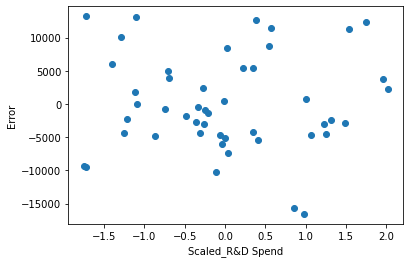

In [132]:
plt.scatter(x =scaled_x_new['R&D Spend'],y = error)
plt.xlabel('Scaled_R&D Spend')
plt.ylabel('Error')
plt.show()

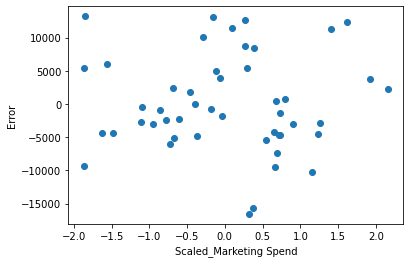

In [133]:
plt.scatter(x =scaled_x_new['Marketing Spend'],y = error)
plt.xlabel('Scaled_Marketing Spend')
plt.ylabel('Error')
plt.show()

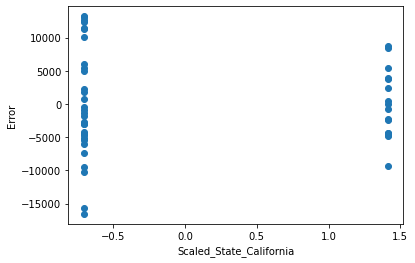

In [134]:
plt.scatter(x =scaled_x_new['State_California'],y = error)
plt.xlabel('Scaled_State_California')
plt.ylabel('Error')
plt.show()

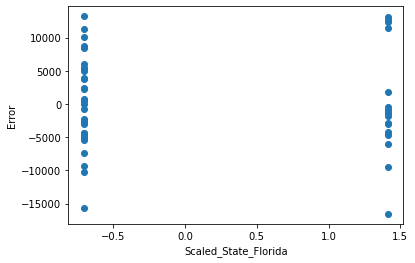

In [135]:
plt.scatter(x =scaled_x_new['State_Florida'],y = error)
plt.xlabel('Scaled_State_Florida')
plt.ylabel('Error')
plt.show()

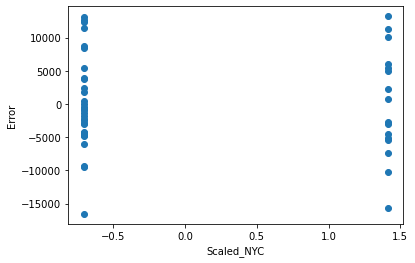

In [136]:
plt.scatter(x =scaled_x_new['State_New York'],y = error)
plt.xlabel('Scaled_NYC')
plt.ylabel('Error')
plt.show()

**Homoscedasticity Failed**

### Test for Normality Quantile -Quantile plot

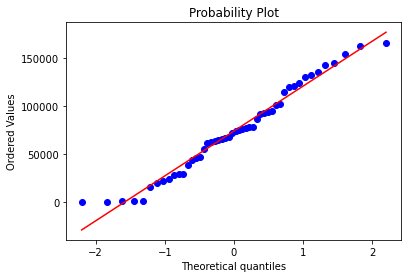

In [138]:
from scipy import stats
stats.probplot(x = x['R&D Spend'],dist='norm',plot = plt)
plt.show()

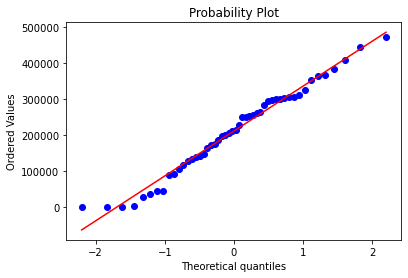

In [139]:
stats.probplot(x = x['Marketing Spend'],dist='norm',plot = plt)
plt.show()

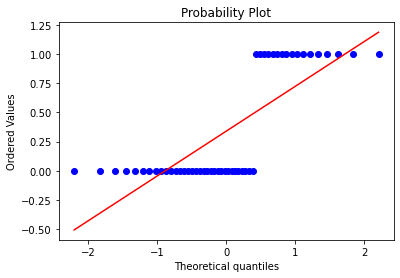

In [140]:
stats.probplot(x = x['State_California'],dist='norm',plot = plt)
plt.show()

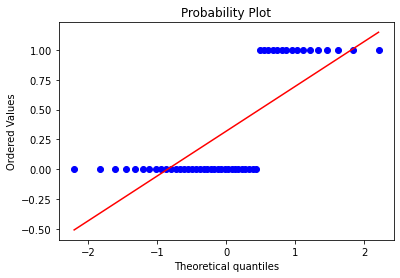

In [141]:
stats.probplot(x = x['State_Florida'],dist='norm',plot = plt)
plt.show()

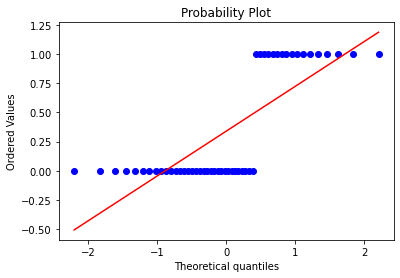

In [142]:
stats.probplot(x = x['State_New York'],dist='norm',plot = plt)
plt.show()

In [155]:
Model_data={'Models':['Model','New_Model','Sqrt_Transform_Model'],'Rsquared':[model.rsquared,new_model.rsquared,model3.rsquared]}
table=pd.DataFrame(Model_data)
table

,Models,Rsquared
0,Model,0.950752
1,New_Model,0.961149
2,Sqrt_Transform_Model,0.929477


**We will use New_Model as it has better R squared value as compared with the other two**